In [1]:
!pip install hdbscan

     -------------------------------------- 595.9/595.9 kB 5.4 MB/s eta 0:00:00
     ------------------------------------- 988.1/988.1 kB 20.8 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from mpl_toolkits import mplot3d
from hdbscan import HDBSCAN
#https://anaconda.org/conda-forge/hdbscan

In [3]:
#IMPORTAMOS BASE DE DATOS 1
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['EDAD']= bd['EDAD'].fillna(method='bfill')

#REMOCION DE OUTLIERS
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[column_name]>=lower_bound) & (df[column_name] <= upper_bound)]
    return df
bd = remove_outliers(bd, 'EDAD')

In [6]:
from sklearn.preprocessing import LabelEncoder
# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar la columna de vínculos utilizando Label Encoding
bd['VINCULO_ENCODED'] = label_encoder.fit_transform(bd['VINCULO_PERSONA_AGRESORA'])

# Seleccionar las columnas de edades y vínculos codificados
selected_data = bd[['EDAD', 'VINCULO_ENCODED']]

In [7]:
#Instanciamos el algoritmo
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
                 
#Entrenamos y predecimos
preds = hdbscan.fit_predict(selected_data)

In [8]:
#Convertimos en dataframe para poder graficar!
selected_data_hdbscan = pd.DataFrame(selected_data)
selected_data_hdbscan.head()

,EDAD,VINCULO_ENCODED
0,39.0,3
1,39.0,0
2,22.0,0
3,53.0,3
4,38.0,3


In [11]:
#Renombramos las columnas!
selected_data_hdbscan = selected_data_hdbscan.rename(columns={'EDAD':'x',
                                                       'VINCULO_ENCODED':'y'})
selected_data_hdbscan.columns

Index(['x', 'y'], dtype='object')

<AxesSubplot: xlabel='x', ylabel='y'>

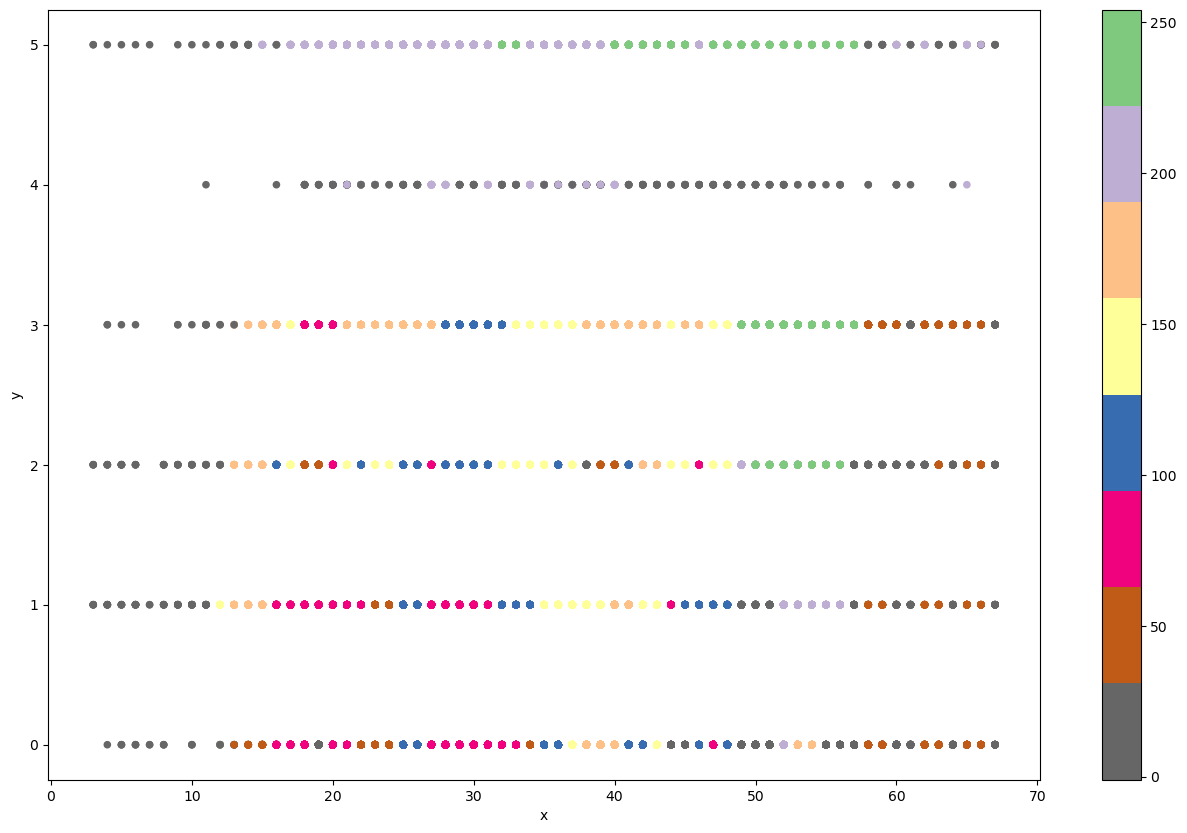

In [12]:
#Graficamos
selected_data_hdbscan.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))